In [ ]:
#Formação Cientista de Dados - Fernando Amaral 
# Faça você mesmo - Visualização

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn

In [2]:
# Carregamento da base de dados
base = pd.read_csv('dados.csv', sep=';')
base.shape

(187, 4)

In [3]:
base.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


[Text(0.5, 1.0, 'PIB')]

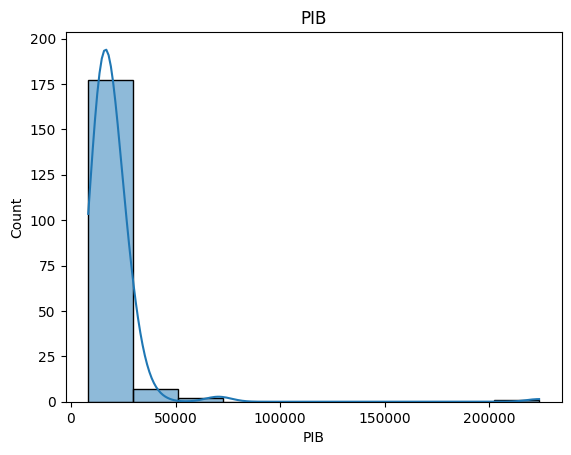

In [4]:
#Exibe a maior parte dos municipios com PIB com valor até 50.000,00 R$
srn.histplot(base.PIB, kde=True, bins=10).set(title='PIB')

[Text(0.5, 1.0, 'Empenho')]

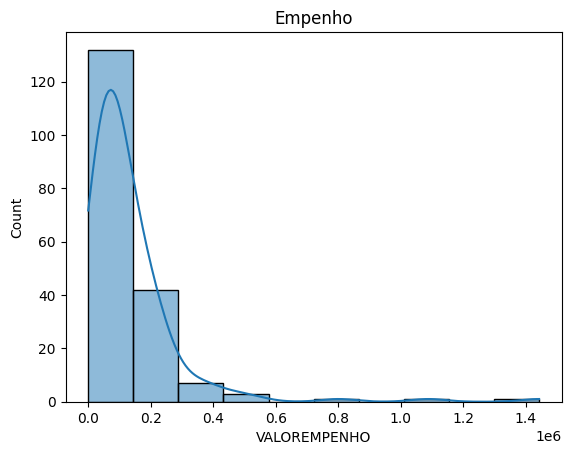

In [5]:
srn.histplot(base.VALOREMPENHO, kde=True, bins=10).set(title='Empenho')

<Axes: xlabel='MUNICIPIO'>

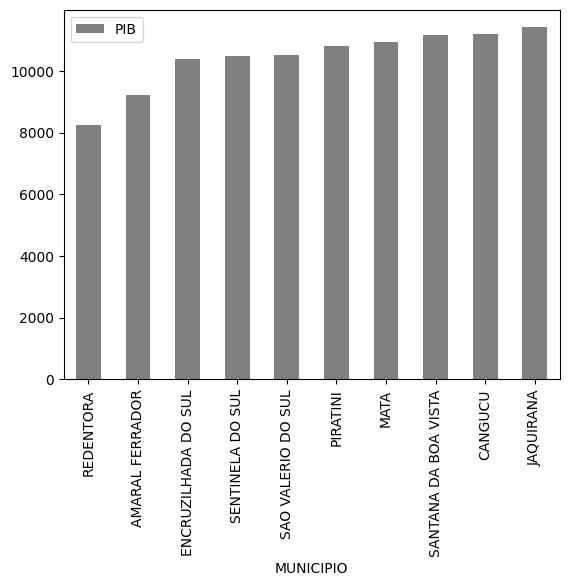

In [6]:
agrupado = base.sort_values('PIB').head(10)
agrupado = agrupado.iloc[:,1:3]
agrupado
agrupado.plot.bar(x='MUNICIPIO',y='PIB', color = 'gray')

#10 municipios com PIB até 10.000,00 R$

*   O Município de Redentora teve o PIB pouco acima dos 8.000,00 R$
*   O município de Jaquirana teve o PIB acima dos 10.000,00 R$

Se compararmos os empenhos dos dois municípios vemos que o fator da disparidade se dá devido ao empenho aplicado pelo município de Jaquirana ser maior que o Redentora.

In [20]:
redentora = base.loc[base['MUNICIPIO'] == 'REDENTORA']
jaquirana = base.loc[base['MUNICIPIO'] == 'JAQUIRANA']

In [21]:
#exibe redentora
redentora

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
88,216,REDENTORA,8236.63,60134.0


In [22]:
#Exibe jaquirana
jaquirana

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
47,288,JAQUIRANA,11413.37,129434.42


In [42]:
# Função para converter horas em dias e horas restantes
def converter_para_dias_e_horas(valor_horas):
    dias = int(valor_horas // 24)  # Parte inteira dos dias
    horas_restantes = valor_horas % 24  # Horas restantes
    return dias, horas_restantes

# Função para converter dias em anos, meses, dias, horas e minutos
def converter_para_ano_mes_dia_hora_minuto(dias, horas_restantes):
    anos = int(dias // 365)  # Parte inteira dos anos
    dias_restantes = dias % 365  # Dias restantes após anos

    meses = int(dias_restantes // 30)  # Parte inteira dos meses
    dias_restantes %= 30  # Dias restantes após meses

    horas = int(horas_restantes)  # Parte inteira das horas
    minutos_restantes = (horas_restantes - horas) * 60  # Minutos restantes após horas

    return anos, meses, dias_restantes, horas, int(minutos_restantes)

# Função principal para converter horas de atuação em Anos, Meses, Dias, Horas e Minutos
def converter_tempo_de_atuacao(valor_horas):
    dias, horas_restantes = converter_para_dias_e_horas(valor_horas)
    anos, meses, dias_restantes, horas, minutos_restantes = converter_para_ano_mes_dia_hora_minuto(dias, horas_restantes)
    return anos, meses, dias_restantes, horas, minutos_restantes

# Exemplo de uso
valor_horas = float(jaquirana['VALOREMPENHO'])
anos, meses, dias_restantes, horas, minutos_restantes = converter_tempo_de_atuacao(valor_horas)
print(f"{valor_horas} horas de atuação é aproximadamente {anos} anos, {meses} meses, {dias_restantes} dias, {horas} horas e {minutos_restantes} minutos.")

129434.42 horas de atuação é aproximadamente 14 anos, 9 meses, 13 dias, 2 horas e 25 minutos.


C:\Users\jwell\AppData\Local\Temp\ipykernel_1984\2680387321.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  valor_horas = float(jaquirana['VALOREMPENHO'])


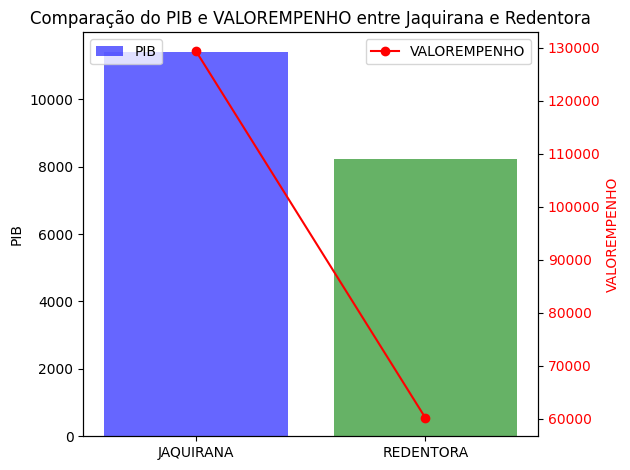

In [36]:
base_filtered = base[base['MUNICIPIO'].isin(['JAQUIRANA', 'REDENTORA'])]

# Agrupar os dados por município e calcular a soma do PIB e VALOREMPENHO
grouped_base = base_filtered.groupby('MUNICIPIO').agg({'PIB': 'sum', 'VALOREMPENHO': 'sum'}).reset_index()

# Plotar os dados
fig, ax1 = plt.subplots()

# Definir a cor das barras para cada município
colors = {'JAQUIRANA': 'blue', 'REDENTORA': 'green'}

# Plotar o PIB
ax1.bar(grouped_base['MUNICIPIO'], grouped_base['PIB'], color=[colors[m] for m in grouped_base['MUNICIPIO']], alpha=0.6, label='PIB')
ax1.set_ylabel('PIB', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Criar um segundo eixo y para VALOREMPENHO
ax2 = ax1.twinx()
ax2.plot(grouped_base['MUNICIPIO'], grouped_base['VALOREMPENHO'], color='red', marker='o', label='VALOREMPENHO')
ax2.set_ylabel('VALOREMPENHO', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título e legendas
plt.title('Comparação do PIB e VALOREMPENHO entre Jaquirana e Redentora')
fig.tight_layout()  # para ajustar o layout
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar o gráfico
plt.show()

<Axes: xlabel='MUNICIPIO'>

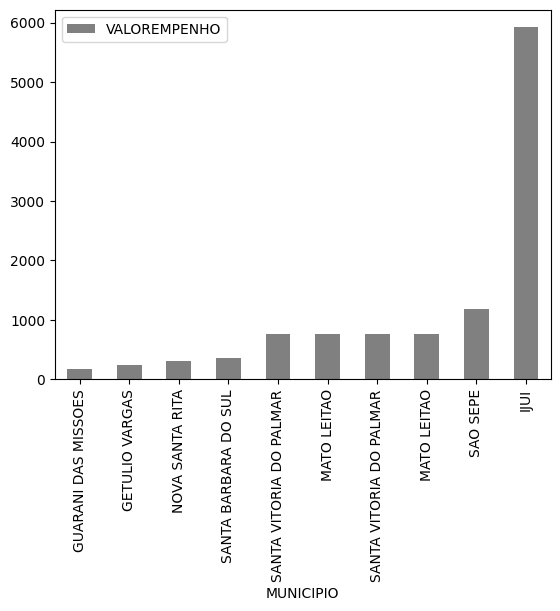

In [7]:
agrupado = base.sort_values('VALOREMPENHO').head(10)
agrupado = agrupado.iloc[:,[1,3]]
agrupado
agrupado.plot.bar(x='MUNICIPIO',y='VALOREMPENHO', color = 'gray')

# Município com mais dias de empenho

É possível notar que o empenho do município de IJUI em dias é maior que os demais.
Nota-se que o fator determinante para o empenho desse município estar acentuado, dá-se pelo fator de aplicação de projetos envolvendo a comunidade, a prefeitura tem feito um trabalho envolvendo mais a opinião pública, o que gera engajamento dos cidadãos para o empenho de horas de trabalho que o próprio município tem cumprido.